# 0 - Imports

In [22]:
import pandas     as pd
import numpy      as np
import seaborn    as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

pd.set_option('display.float_format', '{:.2f}'.format)

## 0.1 - Loading data

In [23]:
df_raw = pd.read_csv('kc_house_data.csv')

# 1 - Helper functions

In [72]:
def attributes(num_attributes):
    #Medidas de tendência central
    minimo = num_attributes.apply(np.min)
    maximo = num_attributes.apply(np.max)
    media = num_attributes.apply(np.mean)
    mediana = num_attributes.apply(np.median)

    #Medidas de dispersão
    amplitude = num_attributes.apply(np.max) - num_attributes.apply(np.min)
    desvio_padrao = num_attributes.apply(np.std)
    variancia = num_attributes.apply(np.var)
    cv = (desvio_padrao / media)*100

    #Medidas de distribuição dos dados
    skewness = num_attributes.apply(skew)
    kurt = num_attributes.apply(kurtosis)

    data_attributes = pd.concat([minimo, maximo, media, mediana, amplitude, desvio_padrao, variancia, cv, skewness, kurt], axis=1)

    columns_new = ['min', 'max', 'mean', 'median', 'amplitude', 'std', 'var', 'cv', 'skewness', 'kurtosis']
    data_attributes.columns=columns_new

    return data_attributes

def feature_eng(data):
    df2 = data.copy()

    df2['waterfront_view'] = df2['waterfront'].apply(lambda x: 'not' if x == 0 else 'yes')

    df2['status_condition'] = df2['condition'].apply(lambda x: 'very_bad' if x == 1 else
                                                               'bad'      if x == 2 else 
                                                               'regular'  if x == 3 else
                                                               'good'     if x == 4 else 'excelent')
    
    df2['status_view'] = df2['view'].apply(lambda x: 'very_bad' if x == 0 else
                                                     'bad'      if x == 1 else
                                                     'regular'  if x == 2 else 
                                                     'good'     if x == 3 else 'excelent')
    
    df2['renovated'] = df2['yr_renovated'].apply(lambda x: 'not_renovated' if x == 0 else 'renovated')
    
    df2['property_type'] = df2['bedrooms'].apply(lambda x: 'loft/shed'    if x == 0  else 
                                                           'kitchenette'  if x == 1  else 'house')
    
    df2['year_date']  = df2['date'].apply(lambda x: x.year)
    df2['month_date'] = df2['date'].apply(lambda x: x.month)
    df2['day_date'] = df2['date'].apply(lambda x: x.day)

    df2['seasons'] = df2['month_date'].apply(lambda x: 'spring' if x >= 3 and x <= 5 else
                                                       'summer' if x >= 6 and x <= 8 else
                                                       'fall'   if x >= 9 and x <= 11 else 'winter')
    
    df2['status_basement'] = df2['sqft_basement'].apply(lambda x: 'without_basement' if x == 0 else 'with_basement')

    df2['day_of_week'] = df2['date'].dt.day_name()

    df2['size_category'] = pd.qcut(df2['sqft_above'], q=4, labels=['size 0', 'size 1', 'size 2', 'size 3'])

    return df2



# 2 - Description data

## 2.1 - Data dimension

In [24]:
df_raw.shape

print(f'Quantidade de colunas: {df_raw.shape[0]}')
print(f'Quantidade de linhas: {df_raw.shape[1]}')

Quantidade de colunas: 21613
Quantidade de linhas: 21


## 2.2 - Columns

In [25]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

- id: Identificação do imóvel
- data: Data de venda do imóvel
- price: Preço do imóvel
- bedrooms: Quantidade de quartos
- bathrooms: Quantidade de banheiros
- sqft_living: Metragem da área interior do apartamento
- sqft_lot: Metragem da área do lote
- floors: Quantidade de andares
- waterfront: Variável que indica a presença ou não de vista para água (0 = não e 1 = sim)
- view: Um índice de 0 a 4 que indica a qualidade da vista da propriedade. Varia de 0 a 4, onde: 0 = baixa 4 = alta
- condition: Condição de conservação do imóvel
- grade: Nota geral dada a unidade habitacional 
- sqft_above: A metragem quadrada do espaço habitacional interior acima do nível do solo
- sqft_basement: A metragem quadrada do porão
- yr_built: Ano de construção do imóvel
- yr_renovated: Ano de reforma do imóvel
- zipcode: Código postal
- lat: Latitude da localização do imóvel
- long: Longitude da localização do imóvel 
- sqft_living15: Medida (em pés quadrado) do espaço interno de habitação para os 15 vizinhos mais próximo
- sqft_lot15: Medida (em pés quadrado) dos lotes de terra dos 15 vizinhos mais próximo

## 2.3 - Data types

In [26]:
df1 = df_raw.copy()

In [27]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [28]:
df1['id'] = df1['id'].astype('str')
df1['date'] = pd.to_datetime(df1['date'])
df1['zipcode'] = df1['zipcode'].astype('str')

## 2.4 - Check NA

In [29]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2.5 - Check duplicates

In [30]:
print(f"Quantidade de dados duplicados: {df1.duplicated().sum()}")

Quantidade de dados duplicados: 0


## 2.6 - Descriptive statistical

In [31]:
#Seleção de atributos numéricos
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

#Seleção de atributos categóricos
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### 2.6.1 - Numerical attributes

 - Analisando os aspectos estatísticos dos dados numéricos

In [67]:
attributes(num_attributes)

,min,max,mean,median,amplitude,std,var,cv,skewness,kurtosis
price,75000.00,7700000.00,540088.14,450000.00,7625000.00,367118.70,134776142225.57,67.97,4.02,34.58
bedrooms,0.00,33.00,3.37,3.00,33.00,0.93,0.86,27.59,1.97,49.05
bathrooms,0.00,8.00,2.11,2.25,8.00,0.77,0.59,36.42,0.51,1.28
sqft_living,290.00,13540.00,2079.90,1910.00,13250.00,918.42,843494.65,44.16,1.47,5.24
sqft_lot,520.00,1651359.00,15106.97,7618.00,1650839.00,41419.55,1715579393.30,274.18,13.06,285.01
floors,1.00,3.50,1.49,1.50,2.50,0.54,0.29,36.14,0.62,-0.48
waterfront,0.00,1.00,0.01,0.00,1.00,0.09,0.01,1147.15,11.38,127.60
view,0.00,4.00,0.23,0.00,4.00,0.77,0.59,327.05,3.40,10.89
condition,1.00,5.00,3.41,3.00,4.00,0.65,0.42,19.09,1.03,0.53
grade,1.00,13.00,7.66,7.00,12.00,1.18,1.38,15.35,0.77,1.19


### 2.6.2 - Categorial attributes

 - Analisando os dados categóricos em torno do preço de venda

In [36]:
cat_attributes.columns

Index(['id', 'date', 'zipcode'], dtype='object')

I) Evolução do preço ao longo do tempo

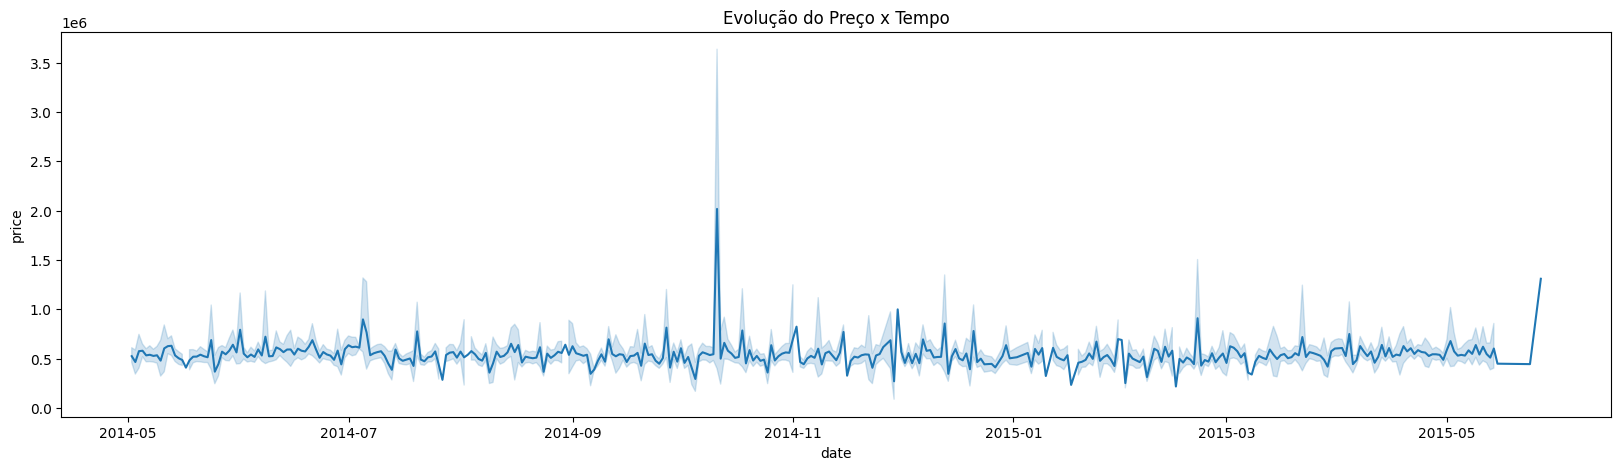

In [37]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df1, x='date', y='price')
plt.title('Evolução do Preço x Tempo')

plt.show()

II) Distribuição do preço pela: waterfronte, view, conditions

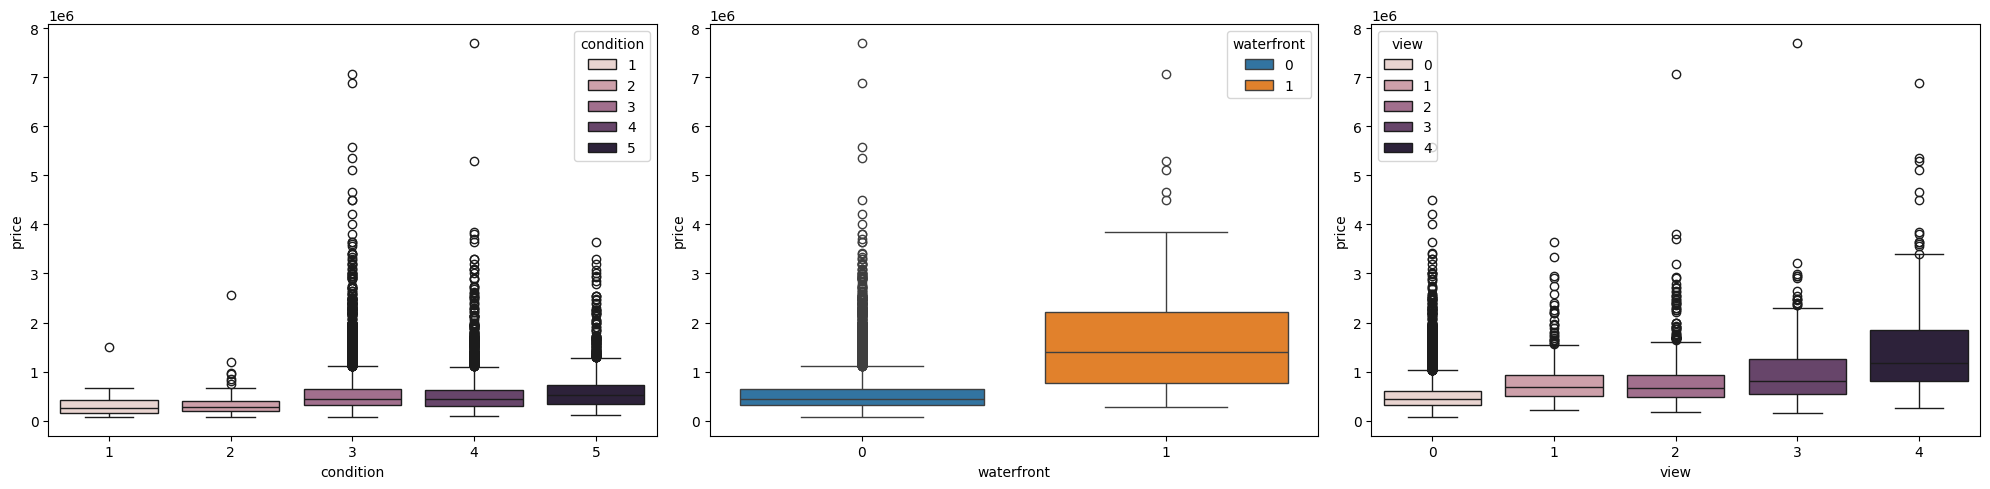

In [38]:
plt.figure(figsize=(20, 5))

# Primeiro gráfico - Condition x Preço
plt.subplot(1, 3, 1)
sns.boxplot(data=df1, x='condition', y='price', hue='condition')

# Segundo gráfico - Waterfront x Preço
plt.subplot(1, 3, 2)
sns.boxplot(data=df1, x='waterfront', y='price', hue='waterfront')

# Terceiro gráfico - View x Preço
plt.subplot(1, 3, 3)
sns.boxplot(data=df1, x='view', y='price', hue='view')

plt.tight_layout()  # Ajusta o espaçamento entre os subplots
plt.show()

# 3 - Feature engineering

In [39]:
df2 = df1.copy()

## 3.1 - Featuring engineering

In [69]:
df2 = feature_eng(df2)

In [70]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront_view',
       'status_condition', 'status_view', 'property_type', 'month_date',
       'year_date', 'day_date', 'seasons', 'renovated'],
      dtype='object')